# Fitting and optimization
### 20/01/2023

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [7]:
xdata = np.array([ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
ydata = np.array([1.2, 4.2, 5.2, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 4.9, 2.1])

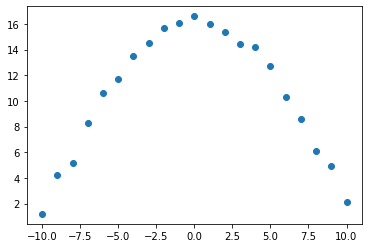

In [8]:
plt.scatter(xdata, ydata)

#### Let's try and fit a Gaussian to our data

In [53]:
# Define the Gaussian function
def gaussian(x, a, b):
    y = a * np.exp(-b * x ** 2)
    return y

parameters, covariance = opt.curve_fit(gaussian, xdata, ydata)

fitted_a, fitted_b = parameters
print(fitted_a, fitted_b)

16.938391501961814 0.015863906100507915


<ipython-input-53-6b80a07af20e>:3: RuntimeWarning: overflow encountered in exp
  y = a * np.exp(-b * x ** 2)


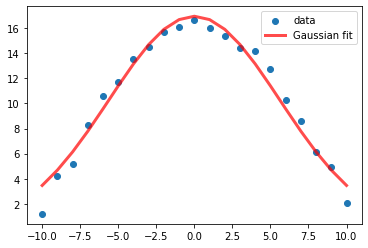

In [10]:
fit_y = gaussian(xdata, fitted_a, fitted_b)
plt.scatter(xdata, ydata, label='data')
plt.plot(xdata, fit_y, '-', label='Gaussian fit', color='r', lw=3,alpha=0.7)
plt.legend()
plt.show()

#### Get the uncertainties from the covarience matrix:

In [11]:
print(covariance)
sigma_a = covariance[0,0] ** 0.5
sigma_b = covariance[1,1] ** 0.5

print(f"\nsigma_a={sigma_a:.1e}, sigma_b={sigma_b:.1e}")

[[1.27597034e-01 1.89676440e-04]
 [1.89676440e-04 7.58907818e-07]]

sigma_a=3.6e-01, sigma_b=8.7e-04


#### Exercicse: now try and fit a cosine

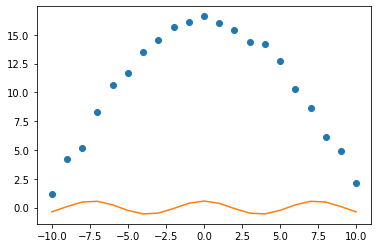

In [12]:
def cos_func(x, D, E):
    y = D*np.cos(E*x)
    return y

parameters, covariance = opt.curve_fit(cos_func, xdata, ydata)
fitted_d = parameters[0]
fitted_e = parameters[1]

fit_cosine = cos_func(xdata, fitted_d, fitted_e)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='cosine fit')

[16.29221863  0.1466471 ]


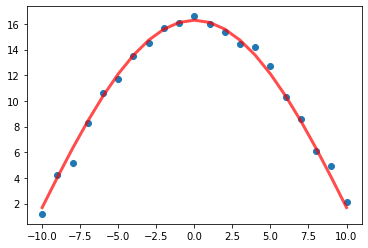

In [13]:
guess = [16, 0.1]
parameters, covariance = opt.curve_fit(cos_func, xdata, ydata, p0=guess)
fitted_d, fitted_e = parameters

fit_cosine = cos_func(xdata, fitted_d, fitted_e)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='cosine fit', color='r', lw=3,alpha=0.7)

print(parameters)

### Minimization

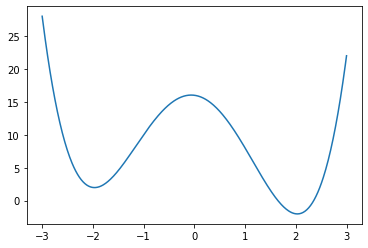

In [14]:
f = lambda x : (x - 2) ** 2 * (x + 2) ** 2 - x

x = np.linspace(-3,3,500)
plt.plot(x, f(x))
plt.show()

     fun: -2.0153881900071995
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 15
     nit: 10
 success: True
       x: 2.030546617253404


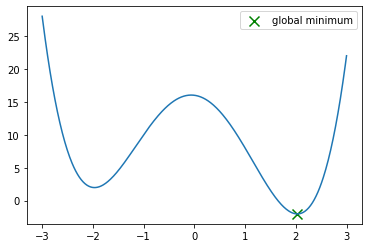

In [15]:
sol = opt.minimize_scalar(f)

print(sol)

plt.plot(x, f(x))
plt.scatter([sol.x], [sol.fun], marker='x', s=100, c='green',label='global minimum')
plt.legend()
plt.show()

     fun: 1.984122901328418
 message: 'Solution found.'
    nfev: 11
     nit: 11
  status: 0
 success: True
       x: -1.9679855231530974


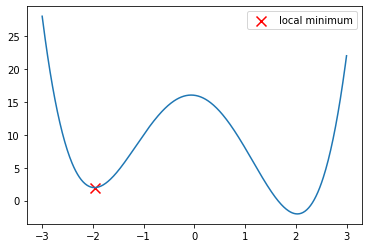

In [16]:
# To select a different local minimum: use bounded minimization

sol_local = opt.minimize_scalar(f, method='bounded', bounds=[-3,0])

print(sol_local)

plt.plot(x, f(x))
plt.scatter([sol_local.x], [sol_local.fun],marker='x', s=100, c='red', label='local minimum')
plt.legend()
plt.show()

### Visualizing your multi-dimensional functions

In [17]:
def egg_crate(x,y):
    return x ** 2 + y ** 2 + 25 * (np.sin(x) ** 2 + np.sin(y) ** 2)

In [18]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
Z = egg_crate(X,Y)
print (Z.shape)

(100, 100)


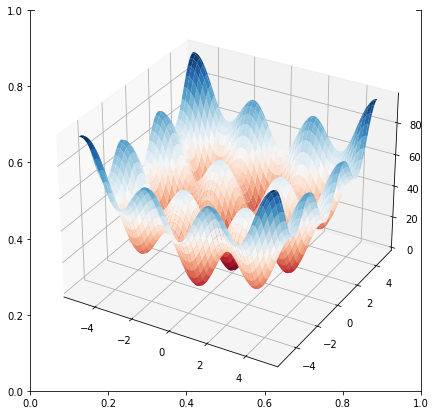

In [19]:
fig, ax = plt.subplots(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='RdBu')

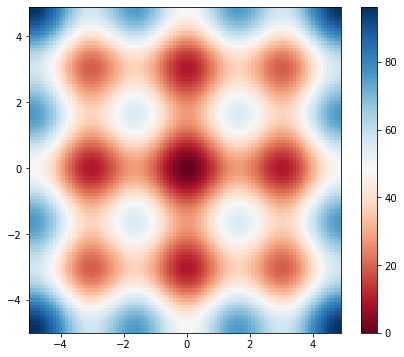

In [20]:
def plot_heat(X=X, Y=Y, Z=Z):
    fig, ax = plt.subplots(figsize=(7,6))
    c = ax.pcolormesh(X, Y, Z, cmap='RdBu', vmin=np.min(Z), vmax=np.max(Z))
    fig.colorbar(c, ax=ax)
    plt.axis([np.min(X), np.max(X), np.min(Y), np.max(Y)])
    
plot_heat()
plt.show()

### Getting creative with optimization methods

In [49]:
NPOINTS = 100
xguess = np.random.random(NPOINTS)
yguess = np.random.random(NPOINTS)

xguess = (xguess - 0.5) * 10
yguess = (yguess - 0.5) * 10

zguess = egg_crate(xguess, yguess)

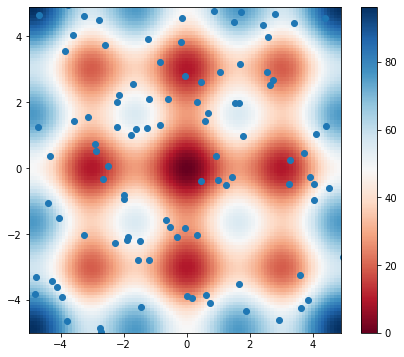

In [50]:
plot_heat()
plt.scatter(xguess, yguess)

plt.show()

In [51]:
def random_steps(npoints, maxstep=0.05):
    '''
    Create an array with length `npoints` containing 
    random steps of maximum size `maxstep`.
    '''
    steps = np.random.uniform(-maxstep, maxstep, npoints)
    return steps

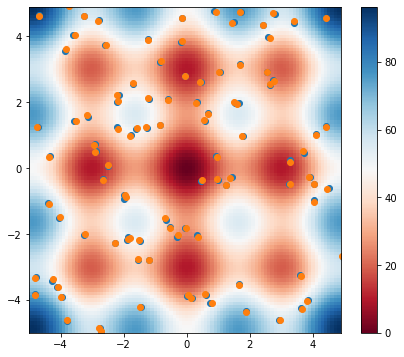

In [52]:
plot_heat()
plt.scatter(xguess, yguess)         # Old positions in blue

x_newguess = xguess + random_steps(NPOINTS) # Apply random steps to x values
y_newguess = yguess + random_steps(NPOINTS) # Apply random steps to y values

plt.scatter(x_newguess, y_newguess) # New positions in orange


## *(TBC in the homework sheet...)*